--- 
title: "Avaliação de um estimador para a duração média do jogo da Ruína do Jogador por simulações de Monte Carlo"
bibliography: references.bib
csl: associacao-brasileira-de-normas-tecnicas.csl
lang: pt

authors:
  - name: "Orientando: Gustavo Silva Garone"
  - name: "Orientadora: Elisabeti Kira"

date: last-modified
date-format: long
format:
  pdf:
    documentclass: article
    fontsize: 12pt
    monofont: "Consolas"
    geometry:
      - top=30mm
      - left=30mm
      - bottom=20mm
      - right=20mm
    number-sections: true
    include-in-header:
      text: |
        \usepackage{authblk}

execute:
  keep-ipynb: true
  # eval: false
fig-cap-location: top
---


# Introdução

Em uma versão simples da original proposta por Pascal [@edwards_pascals_1983], dois jogadores, A e B,
competem apostando no lançamento de uma moeda honesta. Ao ganhar a aposta, o jogador A recebe um real
do jogador B e vice-versa. Além da questão proposta por Pascal sobre a
probabilidade do jogador ir à ruína, ou seja, perder todo seu dinheiro, dado que começou com uma quantia $a$, também
foram estudados o tempo esperado de duração do jogo [@stern_conditional_1975] e, pelo cálculo de equações de diferenças
finitas, a variância dessa duração [@andel_variance_2012].

Todavia, os resultados obtidos por esses autores funcionam apenas para ganho e perda de um real por aposta. Altere o
dinheiro disputado por lançamento, introduza a possibilidade de empate ou crie relações de dependência entre os lançamentos
e os métodos utilizados para calcular analíticamente a esperança da duração do jogo simples já não são mais adequados.
[@ishihara_um_2025]

Neste projeto conjunto com Eduardo Ishihara, propusemos um estimador para
passeios aleatórios com regras mais complexas de ganho e perda e o avaliamos através do emprego de simulações. 
Para isto, empregamos o método de Monte Carlo, uma técnica baseada em amostragem aleatória
para emular sistemas complexos, normalmente por meios computacionais [@harrison_introduction_2010].
Dessa forma, é útil no estudo do comportamento de passeios aleatórios com parâmetros diversos. Sendo assim,
foi crucial na avalição do estimador proposto, uma vez que replicar e adaptar as técnicas e cálculos usados para obter
os resultados nos jogos simples nem sempre é possível com jogos mais complexos.

Empregando simulações, conseguimos verificar os casos nos quais estimador é ou não adequado. Exploramos os jogos em que o
dinheiro em aposta por lançamento não é apenas um real, abordando jogos cujos resultados teóricos ainda não foram desenvolvidos.
Finalmente, com a estrutura do estimador proposto, abrimos caminhos para estudo sobre casos com meios não-homogêneos —
isto é, jogos cujo resultado de cada lançamento dependem dos anteriores — e empates.

# Atividades Desenvolvidas

## Descrevendo jogos

No problema da Ruína do Jogador, além do valor inicial $a$ do primeiro jogador e o dinheiro total em aposta $N$, podemos
empregar uma variável aleatória $X$ para descrever o ganho e perda em cada jogada ao longo do processo estocástico
no tempo discreto $T$. Logo
$$
X = \left\{ \begin{array}{rl}
1, &P(X=1) = p \\
-1, &P(X=-1) = 1-p = q
\end{array} \right .
$$

Com a variável aleatória de regras $X$ dessa forma, com ganho e perda de um real, a esperança da duração $T$ de jogos
desse tipo em função de $a$ e $N$ [@stern_conditional_1975] é dada por
$$
\begin{aligned}
\mu_{a,N} = E(T_{a,N}) = \left\{ \begin{array}{rl}
a(N - a) & \mathbf{se}\ p = q = 1/2 \\
\frac{a}{q - p} - \frac{N}{q - p} \left( \frac{1 - (q/p)^a}{1 - (q/p)^N} \right) & \mathbf{se}\ p \neq q
\end{array} \right.
\end{aligned}
$$ {#eq-original}

Com esse recurso, descreveremos jogos futuros em termos de $J = J(a,N,X)$, em que $a$ representa o valor inicial do
jogador A, $N$
representa o dinheiro total em aposta $N=a+b$, com $b$ o saldo do jogador B, e $X$ a variável aleatória que contém as
regras de ganho e perda do jogo.

Ao empregar e adaptar as técnicas utilizadas para o desenvolvimento de ([-@eq-original])
para outras formas de regras $X$ mais complexas — como com valores de ganho
e perda diferentes de $1$; ou com mais valores possíveis — percebe-se que se torna inviável a resolução analítica de
problemas desse tipo conforme a complexidade de $X$ aumenta. Portanto, na busca de conseguir aproximar esses resultados,
foi proposto um estimador para a esperança da duração de jogos desse tipo [@ishihara_um_2025]. Para avaliarmos a
precisão desse estimador, empregamos simulações computacionais de jogos atraveś do método de Monte Carlo.

## Introduzindo o estimador

O estimador sob avaliação proposto por Ishihara para a esperança da duração um jogo J é da seguinte forma
$$
\widehat{E}(T_J) = \left\{ \begin{array}{cc}
\frac{N-a}{E(X)} & \mathbf{se}\ E(X) > 0 \\
\left\lvert\frac{a}{E(X)}\right\rvert & \mathbf{se}\ E(X) < 0
\end{array}\right.
$$ {#eq-estimador}

Consideraremos um passeio $J = J(a=30,N=100,X)$, com a variável de regras $X$ dada por
$$
X = \left\{ \begin{array}{rl}
1, P(X=1) = 0.4 \\
-1, P(X=-1) = 0.6
\end{array} \right .
$$
De ([-@eq-original]), temos que o valor teórico do tempo médio de duração do jogo é
$$
\mu_J = \frac{30}{0.2} - \frac{100}{0.2} \left( \frac{1 - (0.6/0.4)^{30}}{1 - (0.6/0.4)^{100}} \right) = 150
$$

De ([-@eq-estimador]), temos que o valor estimado para a esperança da duração de $J$ é $\widehat{E}(T_J) = \frac{30}{0.2}=150$, o que condiz com o resultado téorico.
Isso nos deu certa segurança para continuar explorando o estimador em jogos mais complexos.

### Aplicações em casos com regras diferentes

Exploramos casos com uma maior complexidade da variável de regras $X$.
Um destes foi uma simples variação do jogo anterior, mantendo 
o valor inicial dos jogadores A, $a=30$ e B, $b=70$, $N= a + b = 100$, com a variação de que o apostador ganha
dois reais por vitória e perde apenas um por derrota. Nesse caso, a variável de regras $X$ é dada por
$$
X = \begin{cases}
2, P(X=2) = 0.4 \\
-1, P(X=-1) = 0.6 \\
\end{cases}
$$

Denotamos esse novo jogo por $J = (a=30, N=100, X)$

Uma vez que ([-@eq-original]) não seria apropriada para fornecer a esperança da duração do jogo devido à nova forma de
$X$, impossibilitando uma comparação com o estimador, desenvolvemos algoritmos de simulação
baseados no método de Monte Carlo para avaliarmos o estimador ([-@eq-estimador]) da esperança da duração do jogo.
A primeira versão do algoritmo, implementada em Python, não satisfez as demandas de tempo e complexidade computacional
que desejávamos.
Para solucionar essa limitação, migramos para a linguagem Julia, com velocidade computacional competitiva com o C
[@godoy_evaluating_2023], conhecida por sua alta eficiência característica da operação em baixo nível. Assim,
conseguimos realizar um número maior de simulações em tempo razoável, melhorando a acurácia dos resultados
[@ritter_determining_2011].

Denotamos por $\bar{\psi}_{M,J}$ a média das durações dos $M$ jogos $J$ simulados. Pela Lei dos Grandes Números, temos que
$\bar{\psi}_{M,J}\stackrel{M \rightarrow \infty}{\rightarrow} \mu_J$. Isto é, a média dos valores simulados se aproxima
da esperança de duração conforme o número de simulações $M$ cresce.

Pelo Apêndice A, que contém o código da simulação de $M=1000000$ jogos $J$ e uma comparação entre as linguagens Julia e Python,
obtivemos a média da duração dos jogos simulados $\bar{\psi}_{M,J} = 350.29$.

Aplicando o estimador ([-@eq-estimador]), temos que
$$
\widehat{E}(T_J) = \frac{70}{0.2} = 350
$$

Não se tratou de um resultado isolado. Sob diferentes regras, o estimador ([-@eq-estimador]) geralmente mostrou forte concordânciacom os valores simulados. 

| $E(X)$ | $\widehat{E}(T_J)$ | $\bar{\psi}_{M,J}$ |
|:------:|:------:|:------:|
| $4$    | $12.5$    | $13.09$     |
| $2$     | $25$      | $25.77$     |
| $1$     | $50$      | $51.39$     |
| $0.5$   | $100$     | $100.95$    |
| $-1$    | $50$      | $50.49$     |
| $-3$    | $16.66$   | $16.66$     |


: Resultados de diferentes regras $X$ com $a=50$ e $N=100$ {#tbl-simulados}

A [@tbl-simulados] destaca que o estimador consegue, com certa precisão, fornecer uma aproximação da esperança da duração
de um jogo com regras diversas, o que, até onde encontramos na literatura, não foi descrito apenas com
desenvolvimento analítico.

Não obstante, vale notar que, quanto menor $E(X)$, mais impreciso aparenta ser o estimador.
Para explorar esse fenômeno, fixamos $a, N$ e os valores que $X$ pode assumir, variando a probabilidade $p$ do jogador
$A$ ganhar um lançamento e, por consequência, alterando $E(X)$.


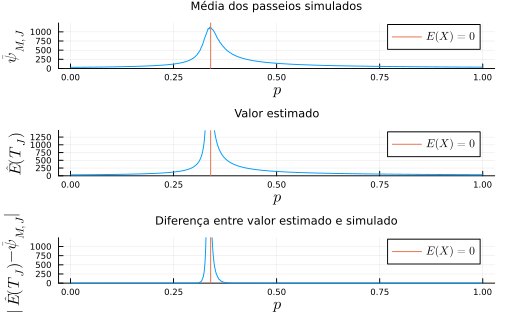

In [1]:
#| echo: false
#| fig-env: figure
#| fig-cap: Comparação entre o estimador e média de simulações $^{\qquad \qquad \qquad \qquad M= 10000, a = 10, N = 100, X = \{2,\; p;\ -1,\; 1-p\},\ p \textrm{ variando } 0.001 \textrm{ em } (0,1)}$
#| fig-cap-location: top
using  Plots, LaTeXStrings, Random
Random.seed!(2)
x = [+2, -1]
a = 30
N = 100
function estimador(p)
  esp = x[1] * p + x[2] * (1-p)
  if esp >= 0
    return (N-a) / esp
  else
    return abs(a / esp)
  end
end

function simulador(p)
  M = 10000
  duracoesSoma = 0
  for i in 1:M  
    saldo = a
    duracao = 0
    while saldo > 0 && saldo < N
      if p > rand()
        saldo += 2
      else
        saldo -= 1
      end
      duracao += 1
    end
    duracoesSoma += duracao
  end
  return duracoesSoma / M
end

function main()
  simulados = [] 
  estimados = []
  alcance = 0.001:0.001:0.999
  for p in alcance
    append!(simulados, simulador(p))
    append!(estimados, estimador(p))
  end
  diferencas = abs.(simulados-estimados)

  simulacoes = plot(alcance, simulados, label="", ylabel=L"\bar{\psi}_{M,J}",
                    title="Média dos passeios simulados",
                    ylim=(0,1.1 * maximum(simulados)))
  vline!([0.34], label=L"E(X)=0")
  estimacoes = plot(alcance, estimados, label="", ylabel=L"\widehat{E}(T_J)",
                    title="Valor estimado", ylim=(0, 1.3*maximum(simulados)))
  vline!([0.34], label=L"E(X)=0")
  diferenca = plot(alcance, diferencas, label="", ylabel=L"|\widehat{E}(T_J)" *
                     L" - \bar{\psi}_{M,J}|", title="Diferença entre valor" *
                     " estimado e simulado", ylim=(0, 1.1*maximum(simulados)))
  vline!([0.34], label=L"E(X)=0")
  analise = plot(simulacoes, estimacoes, diferenca, xlabel=L"p",
                 titlefontsize = 8, layout=(3,1),
#                  plot_title=LaTeXString(
# "\$^{a = 10, N = 100, X = \\{+2, -1\\}, p \\textrm{\\ variando\\ } 0.001 \\textrm{\\ em\\ } (0,1)}\$"),
                 tickfont=6)
  display(analise)
end
main()

Estes gráficos confirmam a inacurácia de ([-@eq-estimador]) conforme $E(X)$ se aproxima de $0$ para um jogo com outras regras
fixadas. Isto ocorre uma vez que, conforme $E(X)$ se aproxima de $0$, sua presença no denominador provoca
divergências quando comparado com o valor simulado. Dessa forma, o estimador não é adequado para jogos com $E(X)$ próximo ou
igual a $0$, o que pode indicar a necessidade de desenvolver, como em ([-@eq-original]), uma forma específica para esses casos
ou alguma outra forma de correção.

# Conclusão e Passos Seguintes

Os resultados obtidos indicam que o estimador proposto possui grande flexibilidade para diferentes configurações do jogo
e mostra-se útil, uma vez que as técnicas analíticas atuais não fornecem um resultado exato para as
configurações de jogos propostas. Ademais, o estimador fornece estimativas mais precisas quando há maior circulação de
dinheiro entre os jogadores, isto é, valores de $a$, $N$ e $X$ que promovam um jogo mais duradouro.
No entanto, observamos que o estimador tende a divergir rapidamente dos resultados simulados quando a esperança da
variável aleatória que rege as regras do jogo aproxima-se de zero devido ao denominador.

Um interessante caminho de abordagem que exploraremos é a conexão entre passeios aleatórios e redes [@doyle_random_1984].
Queremos estudar se existem conexões entre o estimador proposto e fórmulas da física. Dentre outras
abordagens para explorarmos passeios aleatórios, o emprego de equações de diferenças finitas e o estudo de martingais
mostram-se promissores na viabilização do estimador nos casos em que, na forma atual, não é adequado.

No contexto de flexibilizar o estimador, estudaremos casos que envolvam empate entre os jogadores, isto é, lançamentos
onde dinheiro não é circulado e o saldo $a$ permanece o mesmo. Acreditamos que, com a forma atual do estimador,
empates não contribuem informação suficiente para $E(X)$. Esta falha faz com que subestime o efeito retardante que
empates provocam no tempo até o fim do jogo.

Outro desafio identificado foi a complexidade computacional envolvida na simulação de jogos com muitas regras, isto é,
quando a variável aleatória pode assumir muitos valores. Essa limitação impõe a necessidade de soluções mais
eficientes para lidar com cenários de alta complexidade, o que será um obstáculo a ser superado no estudo de passeios
com empate e especialmente passeios não-homogêneos.
Para isso, estudaremos a viabilidade da implementação de computação paralela e concorrente no contexto de simulações de
Monte Carlo, assim como métodos de otimizar nossos métodos de simulação atuais.

# Bibliografia

::: {#refs}
:::


{{< pagebreak >}}


# Apêndice A — Comparação de um mesmo algoritmo em Julia e Python {.appendix}

Para validar nossa decisão de trocarmos de linguagem, comparamos o mesmo (ingênuo) algoritmo em Julia e Python que usamos
na avaliação do estimador:

## Julia


In [2]:
using  LaTeXStrings, Random

function main()
  Random.seed!(1)
  duracoesSoma = 0
  M = 1_000_000
  p = 0.4
  teto = 100
  for i in 1:M
    saldo = 30
    duracao = 0
    while saldo > 0 && saldo < teto
      if p > rand()
        saldo += 2
      else
        saldo -= 1
      end
      duracao += 1
    end
    duracoesSoma += duracao
  end
  display(LaTeXString("Média da duração de \$$M\$ passeios:
                      \$$(round(duracoesSoma/M, digits = 2))\$"))
end

tempo = @elapsed main()
display(LaTeXString("Tempo de execução: $tempo segundos"))

L"Média da duração de $1000000$ passeios:
                      $350.29$"

L"Tempo de execução: 1.21920308 segundos"

{{< pagebreak >}}


## Python

```python
import random
import time


def main():
    random.seed(1)
    duracoes = 0
    M = 1_000_000
    p = 0.4
    teto = 100
    for i in range(M):
        saldo = 30
        duracao = 0
        while saldo > 0 and saldo < teto:
            if p > random.random():
                saldo += 2
            else:
                saldo -= 1
            duracao += 1
        duracoes += duracao
    media = duracoes / M
    print(f"Média da duração de {M} passeios: {media:.2f}")
  

start_time = time.time()
main()
print(f"Tempo de execução: {time.time() - start_time} segundos")
```


In [3]:
#| echo: false

using PyCall, LaTeXStrings

py"""
def simulacao_py():
  import random
  import time

  def main():
      random.seed(1)
      duracoes = 0
      M = 1000000
      p = 0.4
      teto = 100
      for i in range(M):
          saldo = 30
          duracao = 0
          while saldo > 0 and saldo < teto:
              if p > random.random():
                  saldo += 2
              else:
                  saldo -= 1
              duracao += 1
          duracoes += duracao
      return duracoes / M
      # print(f"Média da duração de {M} passeios: {media:.2f}")
    

  start_time = time.time()
  return main()
  # print(f"Tempo de execução: {time.time() - start_time} segundos")
"""
a = @elapsed media = py"simulacao_py"()
display(LaTeXString("Média da duração de \$1000000\$ passeios: \$$(round(media, digits=2))\$"))
display(LaTeXString("Tempo de execução: $a segundos"))

L"Média da duração de $1000000$ passeios: $350.45$"

L"Tempo de execução: 36.625145953 segundos"

Para a simulação em Python nesse artigo, foi utilizado a biblioteca PyCall que nos permite criar um ambiente Python no Julia,
possibilitando executar código Python nessa linguagem o que foi necessário para inclusão de sua saída exata no relatório.
O desempenho pode ter sido afetada minimamente nos tempos de chamada ao Kernel de execução do Python.

## Decisão de mudança

Desconsiderando o curto tempo de compilação do tempo total do código em Julia, que só precisa ser
feito uma vez, temos que essa linguagem costuma ser considerávelmente mais rápida do que o Python, o que foi crucial nessas
simulações e justificou nossas mudanças como previsto por resultados anteriores [@godoy_evaluating_2023].

# Apêndice B — Código de simulação com regras mais complexas


In [4]:
using Random, LaTeXStrings

function simulador(;a = 50, N = 100,
                   X=[[1, 0.5],[-1, 0.5]],
                   M=10_000, semente = 0)
  Random.seed!(semente)
  duracoesSoma = 0
  edex = 0
  for x in X
    edex += x[1] * x[2]
  end
  edex = round(edex, digits=2)

  for i in 1:M
    saldo = a
    duracao = 0
    while saldo > 0 && saldo < N
      p = rand()
      for x in X
        p -= x[2]
        if p < 0
          saldo += x[1]
          break
        end
      end
      duracao += 1
    end
    duracoesSoma += duracao
  end
  display(LaTeXString("A média da duração de \$$M\$ passeios do jogo
                      com \$a = $a, N=$a\$ e \$E(X)=$edex\$ é
                      \$\\bar{\\psi}_{M,J}=
                      $(round(duracoesSoma/M, digits = 2))\$"))
end
simulador(X=[[8, 0.6],[-2, 0.4]], semente = 0) # 4
simulador(X=[[6, 0.5],[4, 0.25], [-8, 0.25]], semente = 1) # 2 
simulador(X=[[2, 0.5],[6, 0.2], [-4, 0.3]], semente = 2) # 1
simulador(X=[[1, 0.5],[3, 0.2], [-2, 0.3]], semente = 3) # 0.5
simulador(X=[[-2, 0.5],[-6, 0.2], [4, 0.3]], semente = 4) # -1
simulador(X=[[5, 0.2],[-5, 0.8]], semente = 5) # -3

L"A média da duração de $10000$ passeios do jogo
                      com $a = 50, N=50$ e $E(X)=4.0$ é
                      $\bar{\psi}_{M,J}=
                      13.09$"

L"A média da duração de $10000$ passeios do jogo
                      com $a = 50, N=50$ e $E(X)=2.0$ é
                      $\bar{\psi}_{M,J}=
                      25.77$"

L"A média da duração de $10000$ passeios do jogo
                      com $a = 50, N=50$ e $E(X)=1.0$ é
                      $\bar{\psi}_{M,J}=
                      51.39$"

L"A média da duração de $10000$ passeios do jogo
                      com $a = 50, N=50$ e $E(X)=0.5$ é
                      $\bar{\psi}_{M,J}=
                      100.95$"

L"A média da duração de $10000$ passeios do jogo
                      com $a = 50, N=50$ e $E(X)=-1.0$ é
                      $\bar{\psi}_{M,J}=
                      50.49$"

L"A média da duração de $10000$ passeios do jogo
                      com $a = 50, N=50$ e $E(X)=-3.0$ é
                      $\bar{\psi}_{M,J}=
                      16.66$"